# Với dữ liệu penbased-5an-nn.csv
  ## Yêu cầu 1: Đọc và chuẩn hóa dữ liệu. Sau đó chọn một thuật toán thích hợp để thực hiện việc xác định một mẫu là loại (class) nào (trong các loại từ 0->9).
    1. Áp dụng thuật toán thích hợp để xây dựng model.Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp
    2. Đánh giá model dựa trên train/test
    3. Trực quan hóa dữ liệu
  ## Yêu cầu 2: Áp dụng thuật toán PCA và thuật toán đã chọn ở yêu cầu 1 để thực hiện việc xác định một mẫu là loại (class) nào (trong các loại từ 0 -> 9). Nhận xét kết quả giữa áp dụng và không áp dụng PCA

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/CSS/LDS6_K268_ONLINE_HuynhVinhThang/LDS6_HuynhVinhThang_Cuoi_ky'

/content/gdrive/My Drive/CSS/LDS6_K268_ONLINE_HuynhVinhThang/LDS6_HuynhVinhThang_Cuoi_ky


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, mean_squared_error, mean_absolute_error, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")


In [ ]:
penbased = pd.read_csv('penbased-5an-nn.csv', header = None)
penbased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10992 non-null  int64
 1   1       10992 non-null  int64
 2   2       10992 non-null  int64
 3   3       10992 non-null  int64
 4   4       10992 non-null  int64
 5   5       10992 non-null  int64
 6   6       10992 non-null  int64
 7   7       10992 non-null  int64
 8   8       10992 non-null  int64
 9   9       10992 non-null  int64
 10  10      10992 non-null  int64
 11  11      10992 non-null  int64
 12  12      10992 non-null  int64
 13  13      10992 non-null  int64
 14  14      10992 non-null  int64
 15  15      10992 non-null  int64
 16  16      10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [ ]:
penbased.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


## Data Understanding
- This is unlabeled data with no null values.
- The sample size is 11k rows which mean this is a medium data.
- All of the variable are numerics (no categories) and the value seem not to much mismatches.
#### =>Some of the classification model can work with unlabeled data are tree model (Decision/Random), SVC (If don't know which model to use), KNN and BernoulliNB

## Data Preprocessing

### Single Variables Analysis

In [ ]:
#Continuous
def single_continuous(a):
    print(penbased[a].describe())
    print('Giá trị trung vị: ', penbased[a].median())
    print('Giá trị mode: ', penbased[a].mode())
    print('Measure of Dispersion: ',np.ptp(penbased[a]))
    print('==================================')
    Q1 = np.percentile(penbased[a], 25)
    Q3 = np.percentile(penbased[a], 75)
    print('Q1 = ', Q1,'\n','Q3 = ', Q3)
    print('==================================')
    print('Phương sai (Variance) = ', penbased[a].var())
    print('Độ lệch chuẩn (std) = ', penbased[a].std())
    print('==================================')
    print('Skew = ', penbased[a].skew())
    print('scipy Skew = ', scipy.stats.skew(penbased[a]))
    print('==================================')
    print('Kurtoisis = ',penbased[a].kurtosis())
    print('scipy kurtosis = ', scipy.stats.kurtosis(penbased[a]))
    print('==================================')
    plt.figure(figsize =(10,5))
    plt.subplot(1,2,1)
    sns.distplot(penbased[a])
    plt.subplot(1,2,2)
    plt.hist(penbased[a])
    plt.show()
    print('==================================')
    plt.figure(figsize = (4,8))
    plt.boxplot(penbased[a])
    plt.show()

======================= 0 =======================
count    10992.000000
mean        39.505277
std         34.185374
min          0.000000
25%          7.000000
50%         33.000000
75%         66.000000
max        100.000000
Name: 0, dtype: float64
Giá trị trung vị:  33.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  7.0 
 Q3 =  66.0
Phương sai (Variance) =  1168.6397683522187
Độ lệch chuẩn (std) =  34.18537360264209
Skew =  0.4704683179530289
scipy Skew =  0.47040411405662763
Kurtoisis =  -1.0821780600678341
scipy kurtosis =  -1.082231667510791


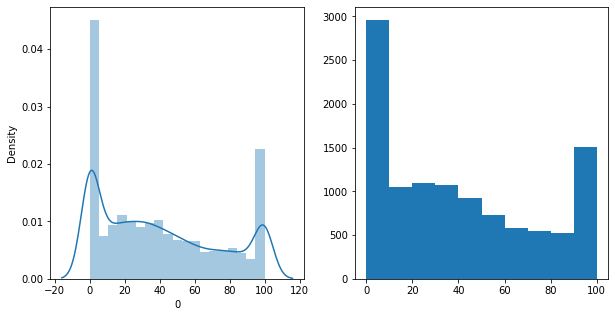

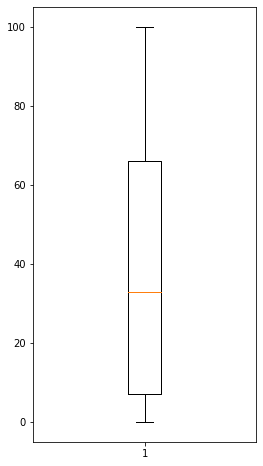

======================= 1 =======================
count    10992.000000
mean        83.219159
std         19.044205
min          0.000000
25%         75.000000
50%         88.000000
75%        100.000000
max        100.000000
Name: 1, dtype: float64
Giá trị trung vị:  88.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  75.0 
 Q3 =  100.0
Phương sai (Variance) =  362.68174370236824
Độ lệch chuẩn (std) =  19.044204990032224
Skew =  -1.672400095112704
scipy Skew =  -1.672171865924147
Kurtoisis =  3.2886110621347915
scipy kurtosis =  3.2865695396303094


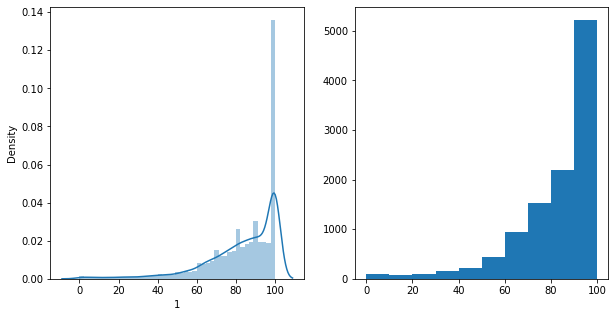

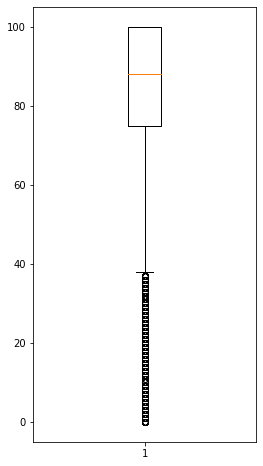

======================= 2 =======================
count    10992.000000
mean        41.046488
std         26.651870
min          0.000000
25%         20.000000
50%         40.000000
75%         59.000000
max        100.000000
Name: 2, dtype: float64
Giá trị trung vị:  40.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  20.0 
 Q3 =  59.0
Phương sai (Variance) =  710.3221949277125
Độ lệch chuẩn (std) =  26.65187038329041
Skew =  0.2642560482558006
scipy Skew =  0.2642199857468108
Kurtoisis =  -0.6466985636562206
scipy kurtosis =  -0.6469502351616834


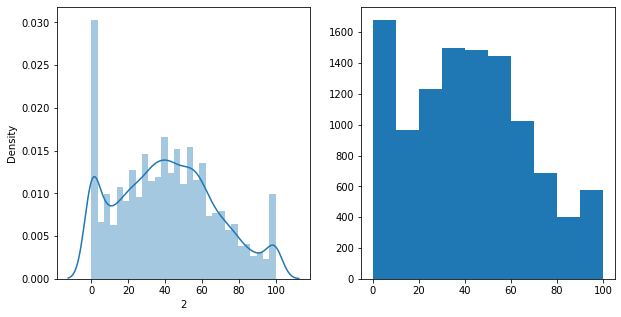

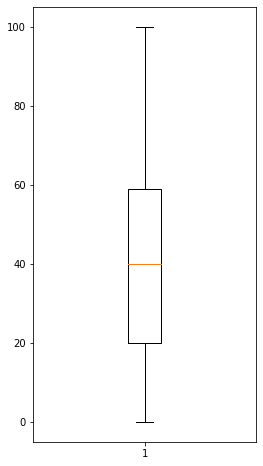

======================= 3 =======================
count    10992.000000
mean        82.074509
std         21.033427
min          0.000000
25%         70.000000
50%         89.000000
75%        100.000000
max        100.000000
Name: 3, dtype: float64
Giá trị trung vị:  89.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  70.0 
 Q3 =  100.0
Phương sai (Variance) =  442.40505662336295
Độ lệch chuẩn (std) =  21.033427125016097
Skew =  -1.2538761382440204
scipy Skew =  -1.253705024205927
Kurtoisis =  1.271503483217805
scipy kurtosis =  1.2703793782378785


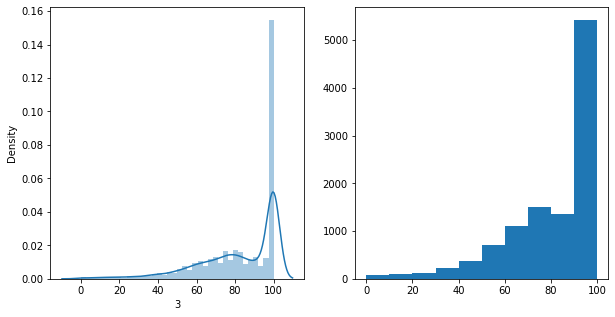

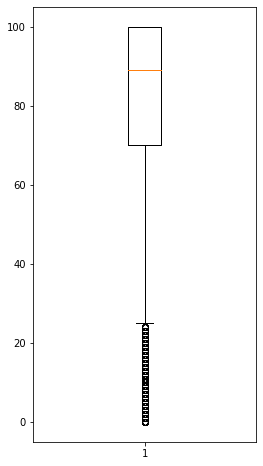

======================= 4 =======================
count    10992.000000
mean        49.764374
std         33.839527
min          0.000000
25%         18.000000
50%         53.000000
75%         78.000000
max        100.000000
Name: 4, dtype: float64
Giá trị trung vị:  53.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  18.0 
 Q3 =  78.0
Phương sai (Variance) =  1145.1136137652773
Độ lệch chuẩn (std) =  33.83952738684861
Skew =  -0.07629880571098518
scipy Skew =  -0.07628839336135297
Kurtoisis =  -1.301339758485538
scipy kurtosis =  -1.3012936871682037


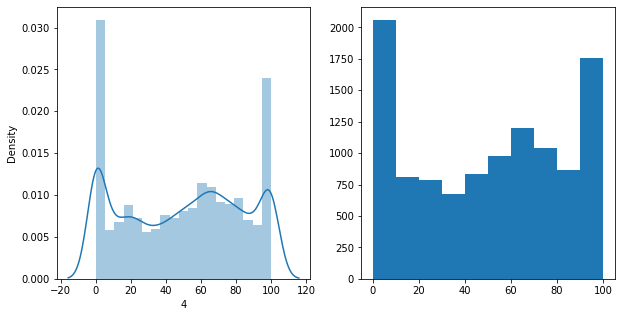

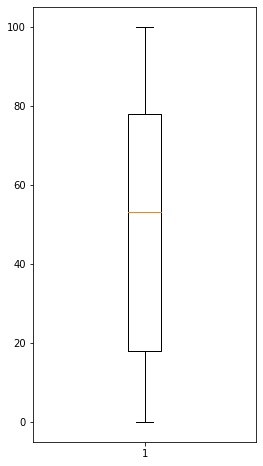

======================= 5 =======================
count    10992.000000
mean        64.793031
std         27.323795
min          0.000000
25%         48.000000
50%         70.000000
75%         86.000000
max        100.000000
Name: 5, dtype: float64
Giá trị trung vị:  70.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  48.0 
 Q3 =  86.0
Phương sai (Variance) =  746.5897685558218
Độ lệch chuẩn (std) =  27.32379491497881
Skew =  -0.6993027793943273
scipy Skew =  -0.699207346904002
Kurtoisis =  -0.2855377813237787
scipy kurtosis =  -0.28595371537743475


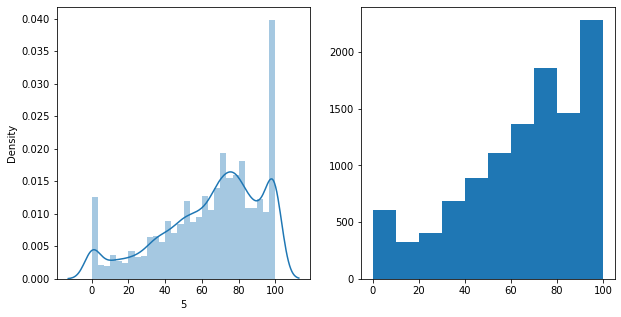

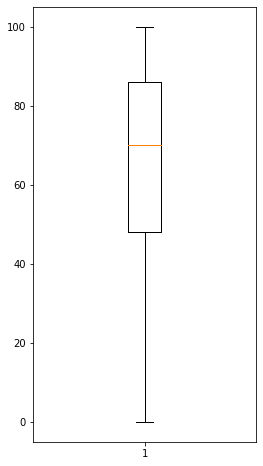

======================= 6 =======================
count    10992.000000
mean        51.261372
std         30.513046
min          0.000000
25%         28.000000
50%         54.000000
75%         74.000000
max        100.000000
Name: 6, dtype: float64
Giá trị trung vị:  54.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  28.0 
 Q3 =  74.0
Phương sai (Variance) =  931.0459538268722
Độ lệch chuẩn (std) =  30.513045633415096
Skew =  -0.13576889561110406
scipy Skew =  -0.13575036749395844
Kurtoisis =  -1.012389447341061
scipy kurtosis =  -1.0124747959251448


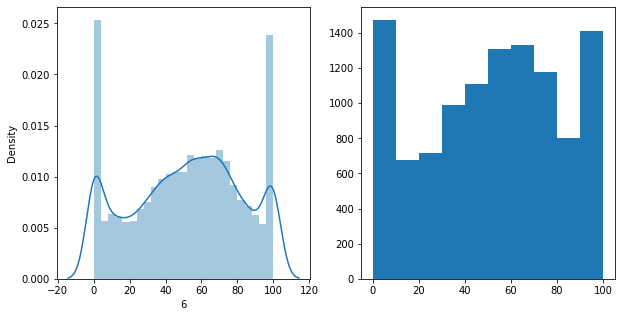

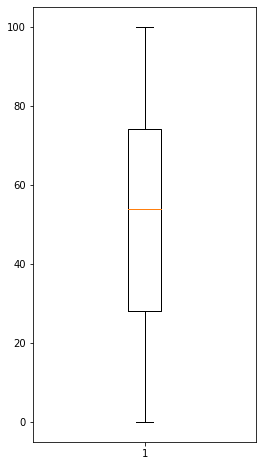

======================= 7 =======================
count    10992.000000
mean        44.677584
std         29.884245
min          0.000000
25%         23.000000
50%         43.000000
75%         65.000000
max        100.000000
Name: 7, dtype: float64
Giá trị trung vị:  43.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  23.0 
 Q3 =  65.0
Phương sai (Variance) =  893.0680881287503
Độ lệch chuẩn (std) =  29.884244814429398
Skew =  0.17486572117775337
scipy Skew =  0.17484185759285678
Kurtoisis =  -0.8425687976001632
scipy kurtosis =  -0.8427313837305888


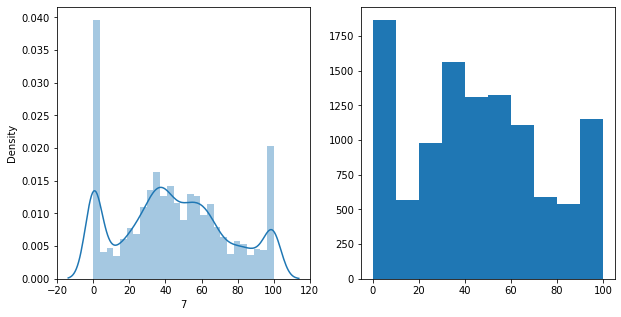

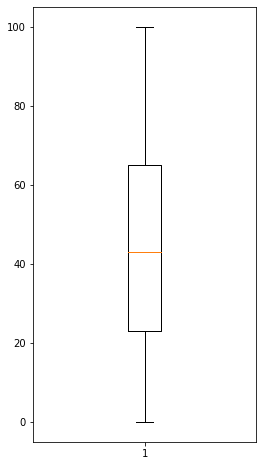

======================= 8 =======================
count    10992.000000
mean        56.449236
std         33.933970
min          0.000000
25%         28.000000
50%         59.000000
75%         88.000000
max        100.000000
Name: 8, dtype: float64
Giá trị trung vị:  59.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  28.0 
 Q3 =  88.0
Phương sai (Variance) =  1151.5143002074842
Độ lệch chuẩn (std) =  33.933969708943344
Skew =  -0.24919093157262073
scipy Skew =  -0.24915692497080652
Kurtoisis =  -1.2534512965625653
scipy kurtosis =  -1.253427005796081


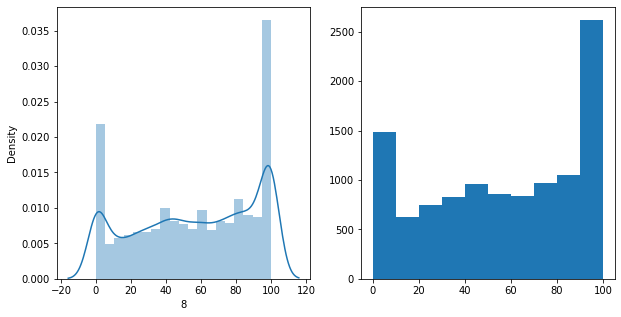

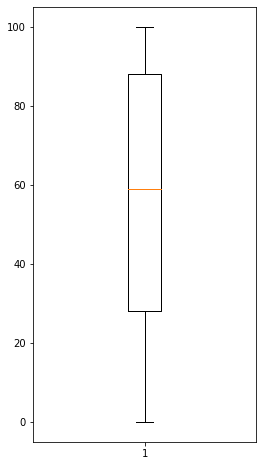

======================= 9 =======================
count    10992.000000
mean        34.557041
std         27.598896
min          0.000000
25%          8.000000
50%         34.000000
75%         55.000000
max        100.000000
Name: 9, dtype: float64
Giá trị trung vị:  34.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  8.0 
 Q3 =  55.0
Phương sai (Variance) =  761.6990478563272
Độ lệch chuẩn (std) =  27.598895772409577
Skew =  0.3411288470933241
scipy Skew =  0.3410822939029764
Kurtoisis =  -0.9516290528685247
scipy kurtosis =  -0.9517420363944771


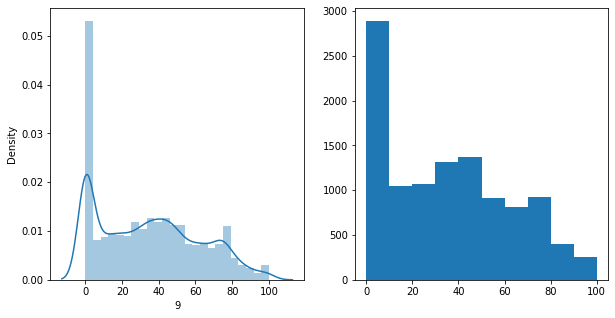

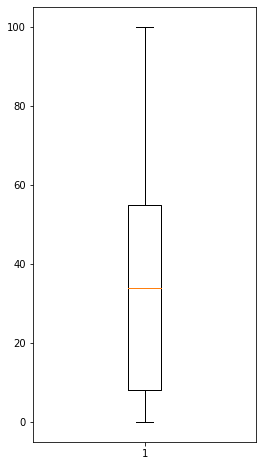

======================= 10 =======================
count    10992.000000
mean        60.086881
std         36.953507
min          0.000000
25%         24.000000
50%         72.000000
75%         96.000000
max        100.000000
Name: 10, dtype: float64
Giá trị trung vị:  72.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  24.0 
 Q3 =  96.0
Phương sai (Variance) =  1365.5616439171758
Độ lệch chuẩn (std) =  36.95350651720586
Skew =  -0.4559997490846464
scipy Skew =  -0.4559375196857006
Kurtoisis =  -1.3325635687046988
scipy kurtosis =  -1.3325032962257721


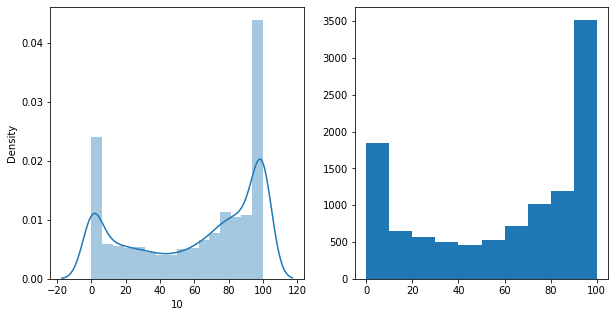

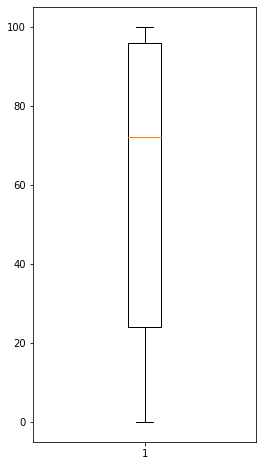

======================= 11 =======================
count    10992.000000
mean        35.706423
std         27.481161
min          0.000000
25%         12.000000
50%         31.000000
75%         57.000000
max        100.000000
Name: 11, dtype: float64
Giá trị trung vị:  31.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  12.0 
 Q3 =  57.0
Phương sai (Variance) =  755.2142322397196
Độ lệch chuẩn (std) =  27.481161406311045
Skew =  0.45869006502819276
scipy Skew =  0.45862746848706226
Kurtoisis =  -0.7887287470191735
scipy kurtosis =  -0.7889158205921345


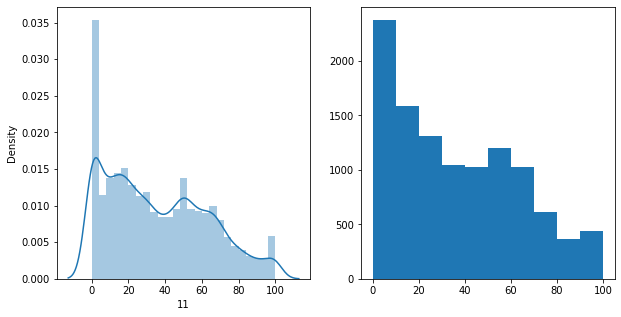

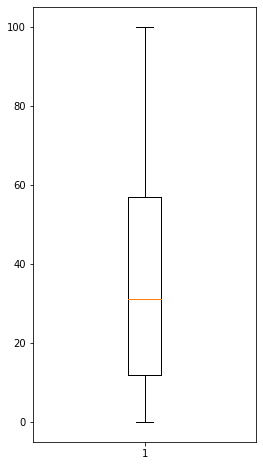

======================= 12 =======================
count    10992.000000
mean        54.602074
std         22.819585
min          0.000000
25%         41.000000
50%         53.000000
75%         68.000000
max        100.000000
Name: 12, dtype: float64
Giá trị trung vị:  53.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  41.0 
 Q3 =  68.0
Phương sai (Variance) =  520.7334612598893
Độ lệch chuẩn (std) =  22.819585036978417
Skew =  -0.005039021076262319
scipy Skew =  -0.005038333410855746
Kurtoisis =  -0.1406495958095988
scipy kurtosis =  -0.14113142766755749


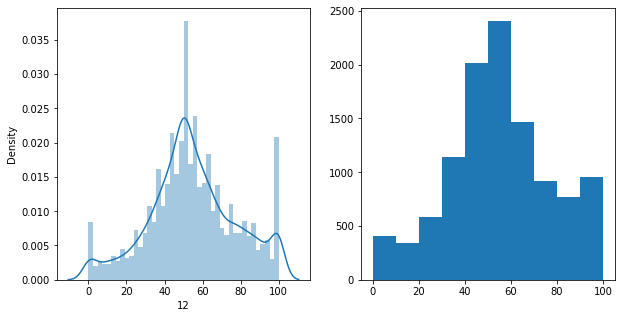

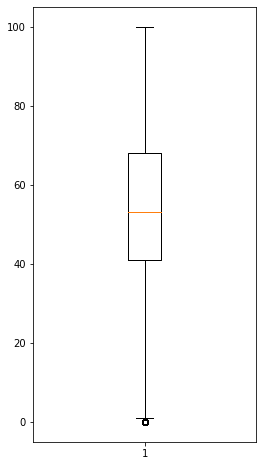

======================= 13 =======================
count    10992.000000
mean        35.654021
std         33.126822
min          0.000000
25%          6.000000
50%         28.000000
75%         51.000000
max        100.000000
Name: 13, dtype: float64
Giá trị trung vị:  28.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  6.0 
 Q3 =  51.0
Phương sai (Variance) =  1097.3863381191459
Độ lệch chuẩn (std) =  33.12682203470695
Skew =  0.7996615554626196
scipy Skew =  0.7995524272052985
Kurtoisis =  -0.6250068694165276
scipy kurtosis =  -0.625268406702399


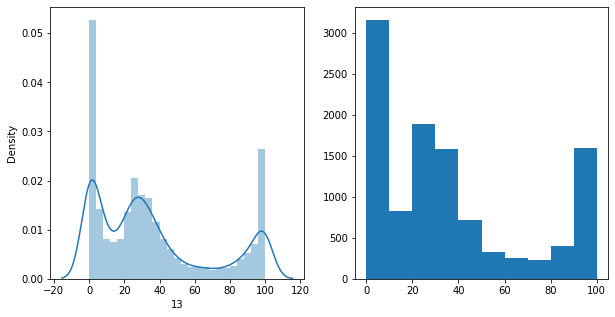

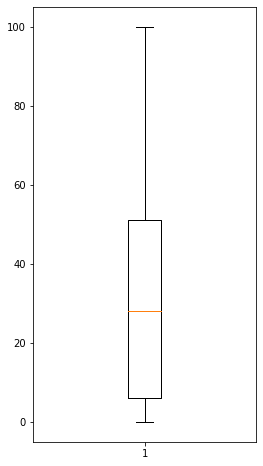

======================= 14 =======================
count    10992.000000
mean        47.381823
std         41.267376
min          0.000000
25%          0.000000
50%         41.000000
75%        100.000000
max        100.000000
Name: 14, dtype: float64
Giá trị trung vị:  41.0
Giá trị mode:  0    100
dtype: int64
Measure of Dispersion:  100
Q1 =  0.0 
 Q3 =  100.0
Phương sai (Variance) =  1702.996314099123
Độ lệch chuẩn (std) =  41.26737590517627
Skew =  0.14102896811681137
scipy Skew =  0.1410097221678005
Kurtoisis =  -1.665151590197638
scipy kurtosis =  -1.6649400505862268


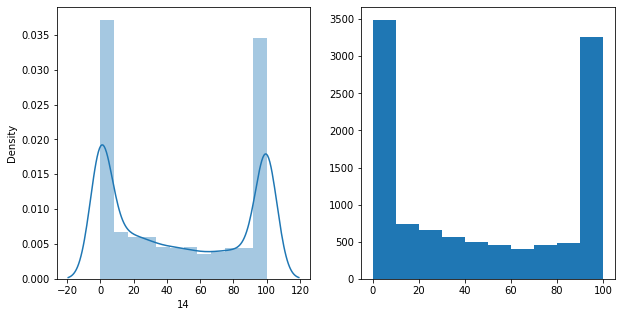

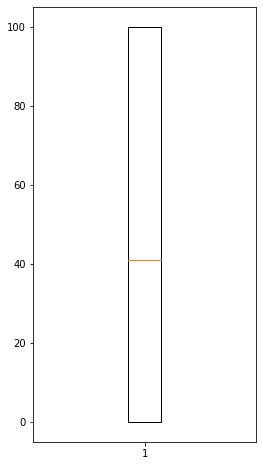

======================= 15 =======================
count    10992.000000
mean        29.784934
std         35.721699
min          0.000000
25%          0.000000
50%         11.000000
75%         55.000000
max        100.000000
Name: 15, dtype: float64
Giá trị trung vị:  11.0
Giá trị mode:  0    0
dtype: int64
Measure of Dispersion:  100
Q1 =  0.0 
 Q3 =  55.0
Phương sai (Variance) =  1276.0398130427852
Độ lệch chuẩn (std) =  35.721699470248964
Skew =  0.888090172955735
scipy Skew =  0.8879689770169572
Kurtoisis =  -0.7514308969104215
scipy kurtosis =  -0.751634934229727


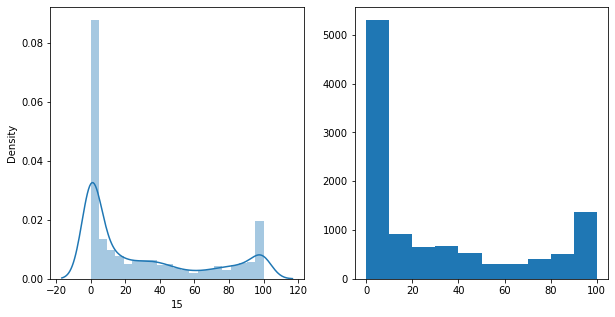

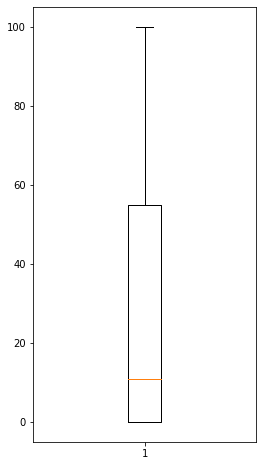

======================= 16 =======================
count    10992.000000
mean         4.431587
std          2.876947
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: 16, dtype: float64
Giá trị trung vị:  4.0
Giá trị mode:  0    2
1    4
dtype: int64
Measure of Dispersion:  9
Q1 =  2.0 
 Q3 =  7.0
Phương sai (Variance) =  8.2768222299655
Độ lệch chuẩn (std) =  2.87694668528381
Skew =  0.026152546316758517
scipy Skew =  0.026148977329623197
Kurtoisis =  -1.232673067478807
scipy kurtosis =  -1.2326582270320223


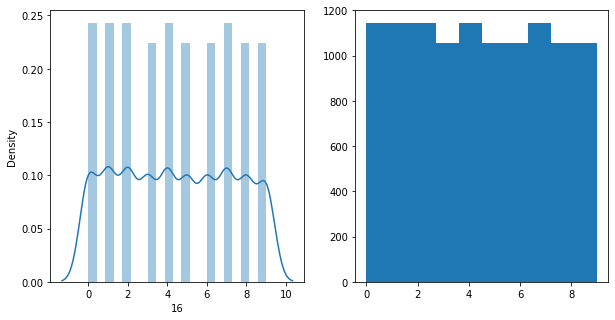

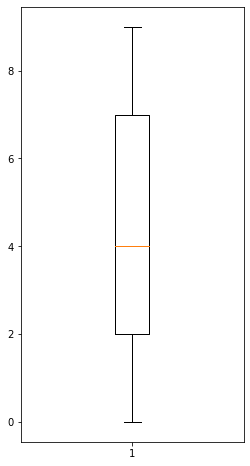

In [ ]:
for i in penbased.columns:
  print('=======================', i, '=======================')
  single_continuous(i)

- There are some information about features:
    - Skewness: Left (1,3,5,6,7,8,10); Right (0,2,9,11,13,14,15); Gaussian(4,12,16)
    - Outlier: 1,3,12

In [ ]:
penbased.columns = penbased.columns.astype('str')

In [ ]:
penbased.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


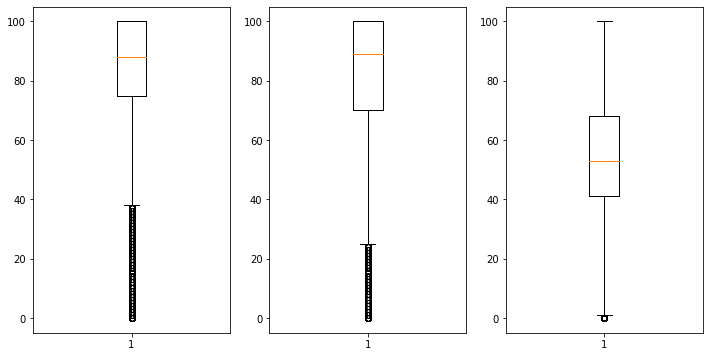

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1,3,1)
plt.boxplot(penbased['1'])

plt.subplot(1,3,2)
plt.boxplot(penbased['3'])

plt.subplot(1,3,3)
plt.boxplot(penbased['12'])
plt.show()

The outliers in features 1 and 3 are alot. We need to caculate the percentage of the outlier in the data

In [ ]:
Q1_1 = np.percentile(penbased['1'], 25)
Q3_1 = np.percentile(penbased['1'], 75)
IQR_1 = scipy.stats.iqr(penbased['1'])

Q1_3 = np.percentile(penbased['3'], 25)
Q3_3 = np.percentile(penbased['3'], 75)
IQR_3 = scipy.stats.iqr(penbased['3'])

lower_1 = penbased['1'][penbased['1'] < (Q1_1 - 1.5*IQR_1)].shape[0]
lower_3 = penbased['3'][penbased['3'] < (Q1_3 - 1.5*IQR_3)].shape[0]

print('Feature 1 outliers: ', lower_1)
print('Feature 3 outliers', lower_3)
print('Total outliers: ', lower_1 + lower_3)
print('Percentage of outliers: ', ((lower_1 + lower_3)/penbased.shape[0])*100, '%')

Feature 1 outliers:  392
Feature 3 outliers 227
Total outliers:  619
Percentage of outliers:  5.63136826783115 %


The outliers accounted for 5.6% (619 rows) of the data, which mean we can delete the data for better performance.

In [ ]:
df = penbased[(penbased['1'] >= (Q1_1 - 1.5*IQR_1)) & (penbased['3'] >= (Q1_3 - 1.5*IQR_3))]

In [ ]:
print('Before reject outliers:', penbased.shape[0])
print('After reject outliers:', df.shape[0])

Before reject outliers: 10992
After reject outliers: 10413


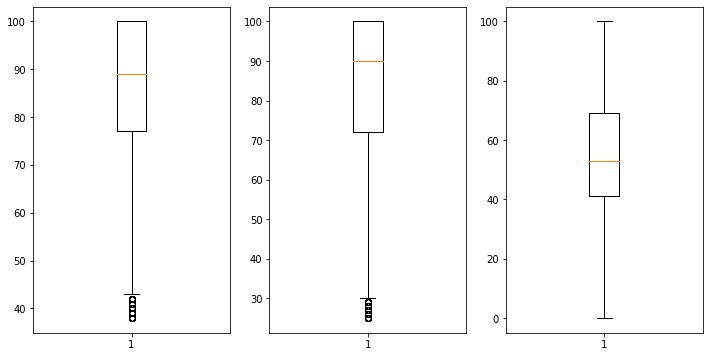

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1,3,1)
plt.boxplot(df['1'])

plt.subplot(1,3,2)
plt.boxplot(df['3'])

plt.subplot(1,3,3)
plt.boxplot(df['12'])
plt.show()

The data look clearner, if we see in the features 12 boxplot, there are no outliers anymore. Althought we see the outliers appear in the plot above but not much.

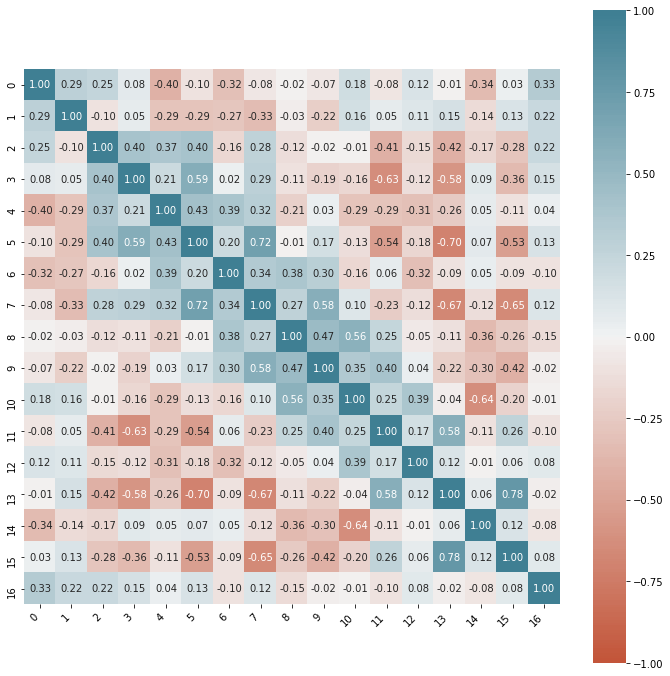

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
     fmt='.2f'
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Most features X does not correlated with y
- there are some variables have strong correlation with each others
    - Possitive (>= 0.60): 3&11, 5&7, 12&15
    - Negative (<= -0.60): 5&13, 7&13, 10&14, 7&15

####I will try with the original data first, then I will use PCA for reduce data's dimension and the data have some features correlated with each other, which mean it suitable to use PCA

## Select features

In [ ]:
X = df.iloc[:,:-1]
y = df[['16']]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32


In [ ]:
y.head()

,16
0,1
1,9
2,2
3,5
4,7


## Cross Validation

In [ ]:
list_k = []
list_acc = []
list_score_train = []
list_score_test = []
abs_train_test = []
test_size_lst = [0.3, 0.25]
for i in test_size_lst:
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = i)
  for K_value in range(2,20): #int((X_train.shape[0]**0.5)/2.0)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    list_acc.append(accuracy_score(y_test, y_pred)*100)
    list_score_train.append(neigh.score(X_train, y_train))
    list_score_test.append(neigh.score(X_test, y_test))
    print("Accuracy is: %0.2f%%" %(accuracy_score(y_test, y_pred)*100), '% for K-Value: ', K_value)
  #score_train = neigh.score(X_train, y_train)
  #score_test = neigh.score(X_test, y_test)
  #print('With[', 1-i,':',i,'], score train is', round(score_train,2), ', score test is', round(score_test,2), ', diff is:', round(abs(score_train - score_test),2))
  position = list_acc.index(max(list_acc))
  k = list_k[position]
  print('\n The optimal number of neighbors is %d with %0.1f%%' %((k, list_acc[position])), 'accuracy score')
  print()
  #Run many time unti we find which k have the highest accuracy score and least volatility
  abs_train_test = abs(np.array(list_score_train) - np.array(list_score_test))

Accuracy is: 95.39% % for K-Value:  2
Accuracy is: 95.97% % for K-Value:  3
Accuracy is: 95.93% % for K-Value:  4
Accuracy is: 95.93% % for K-Value:  5
Accuracy is: 95.93% % for K-Value:  6
Accuracy is: 96.25% % for K-Value:  7
Accuracy is: 96.09% % for K-Value:  8
Accuracy is: 95.81% % for K-Value:  9
Accuracy is: 95.71% % for K-Value:  10
Accuracy is: 95.52% % for K-Value:  11
Accuracy is: 95.52% % for K-Value:  12
Accuracy is: 95.26% % for K-Value:  13
Accuracy is: 95.23% % for K-Value:  14
Accuracy is: 95.20% % for K-Value:  15
Accuracy is: 94.85% % for K-Value:  16
Accuracy is: 95.01% % for K-Value:  17
Accuracy is: 94.72% % for K-Value:  18
Accuracy is: 94.75% % for K-Value:  19

 The optimal number of neighbors is 7 with 96.3% accuracy score

Accuracy is: 95.31% % for K-Value:  2
Accuracy is: 96.24% % for K-Value:  3
Accuracy is: 95.97% % for K-Value:  4
Accuracy is: 96.58% % for K-Value:  5
Accuracy is: 96.43% % for K-Value:  6
Accuracy is: 96.27% % for K-Value:  7
Accuracy is:

- The K value for KNN models is 5 for test_size = 0.25 with 96.6% accuracy score.
- I wish I had tried with test size 0.20 but I couldn't due to the memory of my computer. (It showed an memory error)

In [ ]:
models = [
          LogisticRegression(max_iter=200),
          SVC(),
          RandomForestClassifier(n_estimators=200),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors=5)
]
#loops
CV = 10
entries = []
i = 0
for time in range(0, 11):
  for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    accuracy_scores = []
    for j in range(CV):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
      
      t1 = datetime.datetime.now()
      model_name = model.__class__.__name__
      model.fit(X_train, y_train)
      t2 = datetime.datetime.now()
      d = round((t2-t1).microseconds/1000,1) #miliseconds
      score_train = model.score(X_train, y_train)
      score_test = model.score(X_test, y_test)
      abs_score = abs(score_train - score_test)

      scores_train.append(score_train)
      scores_test.append(score_test)
      abs_scores.append(abs_score)
      times.append(d)

    print(model.__class__.__name__, scores_test)
    entries.append([model_name, np.array(scores_train).mean(),
                    np.array(scores_test).mean(), np.array(abs_scores).mean(),
                    np.array(times).mean()])
    i+=1
  cv_df = pd.DataFrame(entries, columns = ['model_name', 'score_train_mean',
                                          'score_test_mean', 'abs|score|', 'time_mean'])
  cv_df

LogisticRegression [0.8533026113671275, 0.8575268817204301, 0.869431643625192, 0.8655913978494624, 0.8598310291858678, 0.8613671274961597, 0.8621351766513057, 0.8594470046082949, 0.8613671274961597, 0.8632872503840245]
SVC [0.9619815668202765, 0.9604454685099847, 0.9546850998463902, 0.9608294930875576, 0.9696620583717358, 0.9596774193548387, 0.9581413210445469, 0.9658218125960062, 0.9650537634408602, 0.9608294930875576]
RandomForestClassifier [0.9758064516129032, 0.9788786482334869, 0.9704301075268817, 0.9731182795698925, 0.9742703533026114, 0.9696620583717358, 0.9823348694316436, 0.978494623655914, 0.9723502304147466, 0.9696620583717358]
DecisionTreeClassifier [0.9005376344086021, 0.8997695852534562, 0.9009216589861752, 0.901689708141321, 0.8990015360983102, 0.9047619047619048, 0.8963133640552995, 0.8951612903225806, 0.8928571428571429, 0.8943932411674347]
KNeighborsClassifier [0.9685099846390169, 0.9615975422427036, 0.967741935483871, 0.9631336405529954, 0.9650537634408602, 0.9650537

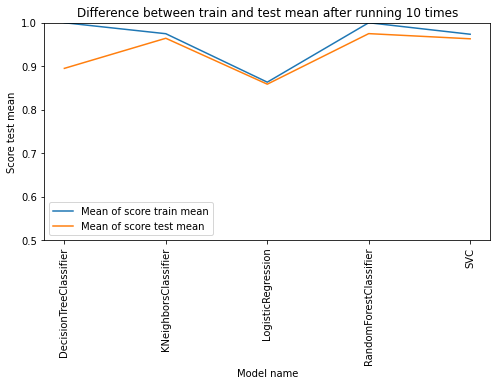

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(cv_df.groupby('model_name')['score_train_mean'].mean(),label = 'Mean of score train mean')
plt.plot(cv_df.groupby('model_name')['score_test_mean'].mean(), label = 'Mean of score test mean')
plt.ylim(0.5,1)
plt.xlabel('Model name')
plt.ylabel('Score test mean')
plt.xticks(rotation = 'vertical')
plt.title('Difference between train and test mean after running 10 times')
plt.legend()
plt.show()

- The plot give us the mean of abs_score value after run 10 times.
- First, we will look at the abs_score, the model have smallest abs_score are Logistic regression, KNN, SVC.
  - But the performance of Logistic quite low, so I won't select that.
- The abs_score of Decision tree classifier is big, so that I will not select it.
- Let's look at the execution time for better decision.

In [ ]:
cv_df.sort_values(by = 'abs|score|').head(20)

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,LogisticRegression,0.863030,0.861329,0.004780,584.81
35,LogisticRegression,0.863427,0.857988,0.005552,676.50
20,LogisticRegression,0.863324,0.858410,0.005872,681.80
30,LogisticRegression,0.863606,0.858257,0.005975,848.04
15,LogisticRegression,0.862569,0.861713,0.006623,769.21
50,LogisticRegression,0.863875,0.858487,0.006705,776.47
10,LogisticRegression,0.862658,0.859217,0.007750,680.54
40,LogisticRegression,0.863427,0.855530,0.007897,572.17
45,LogisticRegression,0.863657,0.859409,0.008029,856.82
5,LogisticRegression,0.863529,0.857181,0.008622,317.00


In [ ]:
cv_df.sort_values(by = 'score_test_mean', ascending = False).head(20)

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
17,RandomForestClassifier,1.000000,0.976344,0.023656,818.78
37,RandomForestClassifier,1.000000,0.976344,0.023656,811.51
47,RandomForestClassifier,1.000000,0.976075,0.023925,809.05
22,RandomForestClassifier,1.000000,0.975115,0.024885,821.02
52,RandomForestClassifier,1.000000,0.974923,0.025077,822.96
32,RandomForestClassifier,1.000000,0.974923,0.025077,817.35
7,RandomForestClassifier,1.000000,0.974885,0.025115,847.62
2,RandomForestClassifier,1.000000,0.974501,0.025499,834.34
42,RandomForestClassifier,1.000000,0.974347,0.025653,811.78
12,RandomForestClassifier,1.000000,0.973694,0.026306,857.10


- The times of Random forest is the lowest (from 800-850s) but its performance is the best when train and test score always on top (above 97%).
- It's slow because it vote for the best tree.
####Sothat I will select this model - RandomForestClassifier

In [ ]:
test_size_lst = [0.3, 0.25, 0.2]
for i in test_size_lst:
  X_train1, X_test1, y_train1, y_test1 =  train_test_split(X, y, test_size = i)
  clf1 = RandomForestClassifier(n_estimators=100)
  clf1.fit(X_train1, y_train1)

  score_train = clf1.score(X_train1, y_train1)
  score_test = clf1.score(X_test1, y_test1)
  
  print('With[', 1-i,':',i,'], score train is', round(score_train,2), ', score test is', round(score_test,2), ', diff is:', round(abs(score_train - score_test),2))

With[ 0.7 : 0.3 ], score train is 1.0 , score test is 0.98 , diff is: 0.02
With[ 0.75 : 0.25 ], score train is 1.0 , score test is 0.98 , diff is: 0.02
With[ 0.8 : 0.2 ], score train is 1.0 , score test is 0.98 , diff is: 0.02


In 3 cases, the same values appear, then I will choose test_size = 0.25

GridSearchCV give some best fit values for the model.

In [ ]:
#n_samples = len(df.images)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

# Set the parameters by cross-validation
param_grid = {
    'n_estimators': [30,50,100,150,200],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion': ['gini', 'entropy']
}

start_time = datetime.now()
CV_rfc= GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid = param_grid, cv = 5)  #cv = 5 : run 5 times
CV_rfc.fit(X_train, y_train)
end_time = datetime.now()
dt = end_time - start_time
second_1 = dt.seconds
print(dt)
print(second_1)
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

0:08:50.263848
530
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}
Accuracy:  0.9600614439324117


## Random Forest with best_params

In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size = 0.25)

In [ ]:
rf_o = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 150)
model_o = rf_o.fit(X_train_o, y_train_o)

In [ ]:
yhat_test_o = rf_o.predict(X_test_o)
yhat_train_o = rf_o.predict(X_train_o)

In [ ]:
#Model evaluation
#score original data (R^2)
R_ori_multi = rf_o.score(X, y)
#score train
R_train_multi = rf_o.score(X_train_o, y_train_o)
#score test
R_test_multi = rf_o.score(X_test_o, y_test_o)

#Accuracy score original
ac_ori = accuracy_score(y, rf_o.predict(X))
#Accuracy score train
ac_train = accuracy_score(y_train_o, yhat_train_o)
#Accuracy score test
ac_test = accuracy_score(y_test_o, yhat_test_o)

print('R^2_original = ', R_ori_multi)
print('R^2_ train = ', R_train_multi)
print('R^2_ test = ', R_test_multi)
print()
print('Accuracy score original = ', ac_ori*100, '%')
print('Accuracy score train = ', ac_train*100, '%')
print('Accuracy score test = ', ac_test*100, '%')

R^2_original =  0.9767598194564486
R^2_ train =  0.9825841977205788
R^2_ test =  0.9592933947772657

Accuracy score original =  97.67598194564486 %
Accuracy score train =  98.25841977205788 %
Accuracy score test =  95.92933947772657 %


The train and test performance are pretty high. Althought Its performance not like the test above, but the result still accepted

In [ ]:
print('=====Train matrix=====')
print('Confusion matrix Train: \n', confusion_matrix(y_true = y_train_o, y_pred = yhat_train_o))
print()
print('=====Test matrix=====')
print('Confusion matrix Test: \n', confusion_matrix(y_true = y_test_o, y_pred = yhat_test_o))

=====Train matrix=====
Confusion matrix Train: 
 [[752   1   0   0   2   0   0   0   0   0]
 [  0 671  54  14   1   0   0   1   0   1]
 [  0   3 809   4   0   0   0   4   0   0]
 [  0   0   1 763   0   2   0   3   0   0]
 [  0   0   0   0 840   0   0   0   0   1]
 [  0   0   0  17   0 770   0   0   0   2]
 [  0   0   0   0   0   1 765   0   0   0]
 [  0   8   1   1   2   0   0 818   1   1]
 [  0   0   0   0   0   0   0   3 759   0]
 [  0   0   0   2   3   0   0   1   1 726]]

=====Test matrix=====
Confusion matrix Test: 
 [[271   0   0   0   0   0   2   0   1   0]
 [  0 226  30   4   0   0   0   0   0   0]
 [  0   5 265   1   0   0   0   1   0   0]
 [  0   3   0 255   0   0   0   1   0   0]
 [  0   0   0   0 257   0   4   0   0   3]
 [  0   0   1   5   0 220   0   0   6   4]
 [  1   0   0   0   1   0 258   0   1   0]
 [  0   5   1   1   2   0   1 261   1   0]
 [  5   0   0   0   1   2   0   8 227   0]
 [  1   2   0   1   1   0   0   0   0 258]]


- The train matrix have 1 wrong at class 0; 70 wrongs at class1, some other class still have but not much.
- The test matrix have 34 wrong value at class 1, and some other but not much (<8).
- It's seem class 1 have some value interupt the model's prediction

In [ ]:
print('========================Train report========================')
print(classification_report(y_train_o, yhat_train_o))
print()
print('========================Test report========================')
print(classification_report(y_test_o, yhat_test_o))

========================Train report========================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       0.98      0.90      0.94       742
           2       0.94      0.99      0.96       820
           3       0.95      0.99      0.97       769
           4       0.99      1.00      0.99       841
           5       1.00      0.98      0.99       789
           6       1.00      1.00      1.00       766
           7       0.99      0.98      0.98       832
           8       1.00      1.00      1.00       762
           9       0.99      0.99      0.99       733

    accuracy                           0.98      7809
   macro avg       0.98      0.98      0.98      7809
weighted avg       0.98      0.98      0.98      7809


========================Test report========================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       274
          

The precision and recall values of train/test are both high

In [ ]:
max_depth = list()
for tree in model_o.estimators_:
  max_depth.append(tree.tree_.max_depth)
print('Max depth %0.1f'%(max(max_depth)))
print('Max depth %0.1f'%(min(max_depth)))
print('Average max depth %0.1f'%(sum(max_depth)/len(max_depth)))

Max depth 8.0
Max depth 8.0
Average max depth 8.0


			AUC of train: 0.9988380373147735 					AUC of test: 0.9961653321081649


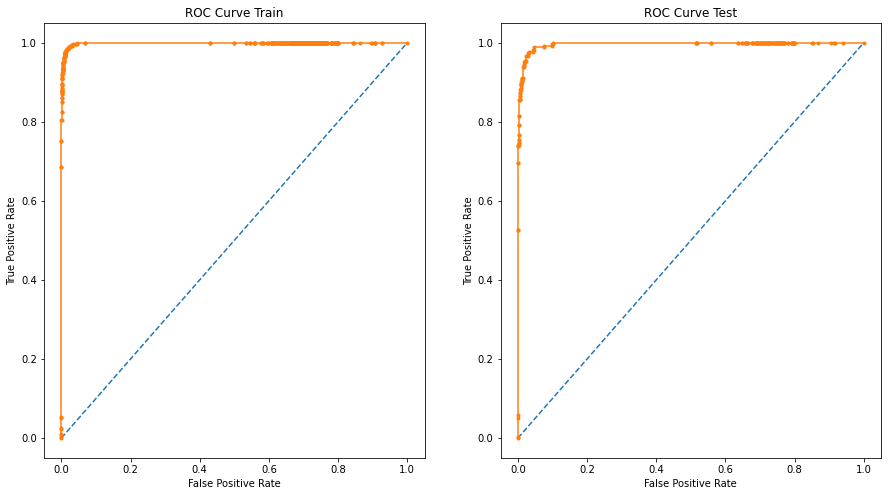

In [ ]:
yprob_train_o = rf_o.predict_proba(X_train_o)
yprob_test_o = rf_o.predict_proba(X_test_o)

train_score_o = yprob_train_o[:,1]
fpr_train_o, tpr_train_o, threholds_train_o = roc_curve(y_train_o, train_score_o, pos_label=1)
test_score_o = yprob_test_o[:,1]
fpr_test_o, tpr_test_o, threholds_test_o = roc_curve(y_test_o, test_score_o, pos_label=1)
print('\t\t\tAUC of train:', auc(fpr_train_o, tpr_train_o),'\t\t\t\t\tAUC of test:', auc(fpr_test_o, tpr_test_o))
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
ax1 = plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_train_o, tpr_train_o, marker = '.')
plt.title('ROC Curve Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1,2,2)
ax2 = plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_test_o, tpr_test_o, marker = '.')
plt.title('ROC Curve Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The plot show that an area of test and train above 0.99 which mean model fit with the data, and it's performance still good

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(.95)

In [ ]:
pca.fit(X_train_o)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

11

In [ ]:
#Apply the mapping transform to both train/test set
X_train_pca = pca.transform(X_train_o)
X_test_pca = pca.transform(X_test_o)

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [ ]:
rf_pca = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 150)
model_pca = rf_pca.fit(X_train_pca, y_train_o)

In [ ]:
yhat_test_pca = rf_pca.predict(X_test_pca)
yhat_train_pca = rf_pca.predict(X_train_pca)

In [ ]:
#Model evaluation

#score train
R_train_pca = rf_pca.score(X_train_pca, y_train_o)
#score test
R_test_pca = rf_pca.score(X_test_pca, y_test_o)


#Accuracy score train
ac_train_pca = accuracy_score(y_train_o, yhat_train_pca)
#Accuracy score test
ac_test_pca = accuracy_score(y_test_o, yhat_test_pca)


print('R^2_ train pca = ', R_train_pca)
print('R^2_ test pca = ', R_test_pca)
print()

print('Accuracy score train = ', ac_train_pca*100, '%')
print('Accuracy score test = ', ac_test_pca*100, '%')

R^2_ train pca =  0.9613266743501089
R^2_ test pca =  0.9178187403993856

Accuracy score train =  95.87655269560763 %
Accuracy score test =  91.66666666666666 %


The data have reduce, sothat the performance will the same due to the lack of information. But the performance still high

In [ ]:
print('=====Train PCA matrix=====')
print('Confusion matrix Train: \n', confusion_matrix(y_true = y_train_o, y_pred = yhat_train_pca))
print()
print('=====Test PCA matrix=====')
print('Confusion matrix Test: \n', confusion_matrix(y_true = y_test_o, y_pred = yhat_test_pca))

=====Train PCA matrix=====
Confusion matrix Train: 
 [[748   1   0   0   2   0   3   0   1   0]
 [  0 608  92  23   2   2   1   9   1   4]
 [  0   3 801   4   0   0   0  12   0   0]
 [  0   3   2 747   2   1   0   3   0  11]
 [  1   2   0   1 827   1   4   0   1   4]
 [  0   2   0  18   0 752   2   0   1  14]
 [  1   0   1   0   4   1 758   0   1   0]
 [  0  12  10   4   1   1   1 799   3   1]
 [  0   4   2   0   0   0   0   9 743   4]
 [  0   3   0   9   6   8   0   0   3 704]]

=====Test PCA matrix=====
Confusion matrix Test: 
 [[270   0   0   0   0   0   1   0   3   0]
 [  0 203  42   6   1   0   0   7   1   0]
 [  0  10 254   0   0   0   0   7   1   0]
 [  0   4   0 239   1   1   0   3   1  10]
 [  1   0   0   0 251   1   5   0   1   5]
 [  0   2   0   5   0 211   2   1   7   8]
 [  4   0   0   0   3   3 250   0   1   0]
 [  0  13   4   2   1   1   0 248   3   0]
 [  3   2   0   1   0   1   2  13 221   0]
 [  1   4   0   4   7   6   1   0   0 240]]


In this case, the wrong values of 2 matrix have been increased.

In [ ]:
print('========================Train PCA report========================')
print(classification_report(y_train_o, yhat_train_pca))
print()
print('========================Test PCA report========================')
print(classification_report(y_test_o, yhat_test_pca))

========================Train PCA report========================
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       755
           1       0.95      0.82      0.88       742
           2       0.88      0.98      0.93       820
           3       0.93      0.97      0.95       769
           4       0.98      0.98      0.98       841
           5       0.98      0.95      0.97       789
           6       0.99      0.99      0.99       766
           7       0.96      0.96      0.96       832
           8       0.99      0.98      0.98       762
           9       0.95      0.96      0.95       733

    accuracy                           0.96      7809
   macro avg       0.96      0.96      0.96      7809
weighted avg       0.96      0.96      0.96      7809


========================Test PCA report========================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       274
  

- Also the precision & recall value, we can clearly see that class 1 have interupt the model above (original). But now, the data reduced also class 1 will more interupt the model.
- The precision 0.94->0.85 and recall 0.87 ->0.78

In [ ]:
max_depth = list()
for tree in model_pca.estimators_:
  max_depth.append(tree.tree_.max_depth)
print('Max depth %0.1f'%(max(max_depth)))
print('Max depth %0.1f'%(min(max_depth)))
print('Average max depth %0.1f'%(sum(max_depth)/len(max_depth)))

Max depth 8.0
Max depth 8.0
Average max depth 8.0


			AUC of train PCA: 0.9965686534391465 					AUC of test PCA: 0.9872735626148597


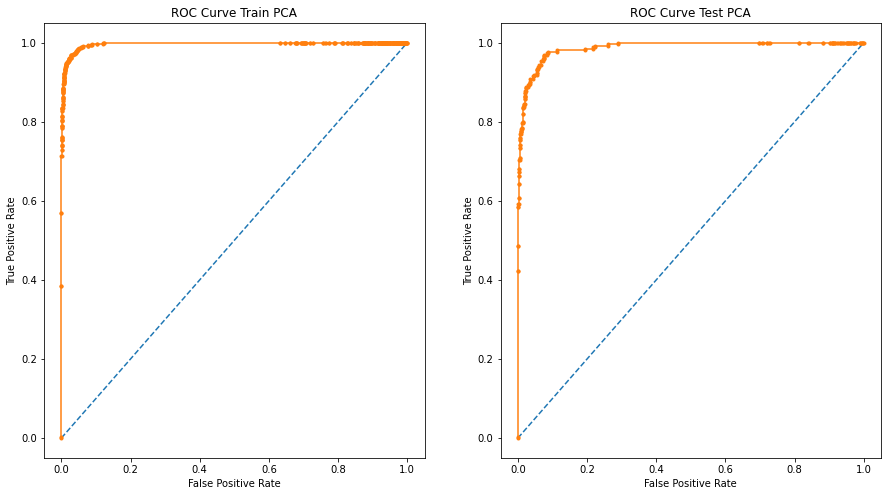

In [ ]:
yprob_train_pca = rf_pca.predict_proba(X_train_pca)
yprob_test_pca = rf_pca.predict_proba(X_test_pca)

train_score_pca = yprob_train_pca[:,1]
fpr_train_pca, tpr_train_pca, threholds_train_pca = roc_curve(y_train_o, train_score_pca, pos_label=1)
test_score_pca = yprob_test_pca[:,1]
fpr_test_pca, tpr_test_pca, threholds_test_pca = roc_curve(y_test_o, test_score_pca, pos_label=1)
print('\t\t\tAUC of train PCA:', auc(fpr_train_pca, tpr_train_pca),'\t\t\t\t\tAUC of test PCA:', auc(fpr_test_pca, tpr_test_pca))
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
ax1 = plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_train_pca, tpr_train_pca, marker = '.')
plt.title('ROC Curve Train PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1,2,2)
ax2 = plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_test_pca, tpr_test_pca, marker = '.')
plt.title('ROC Curve Test PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The area of both plot still high but the performance showed that it does not good enough.
####In conclusion, It acceptable to use RandomForestClassifier with original data althought the time execution quite slow, but the performance definitely better